<a href="https://colab.research.google.com/github/gustaaa/UAS-PCVK_Genap_2023/blob/master/UAS_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 9 - Deteksi Bakteri**

1.   Dewi Laylaturrohmah / 06 - 2041720163
2.   Gustania Nirmala Meisi / 10 - 2041720107


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


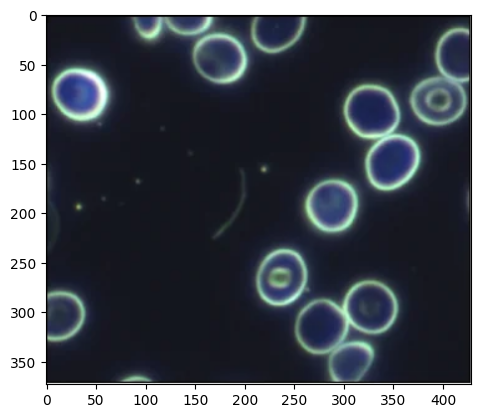

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
# where you stored image
image_origin = cv2.imread("/content/drive/MyDrive/PCVK/img/yes.PNG")
image_origin = cv2.cvtColor(image_origin,cv2.COLOR_BGR2RGB)
image_contorus = image_origin.copy()

plt.imshow(image_contorus)

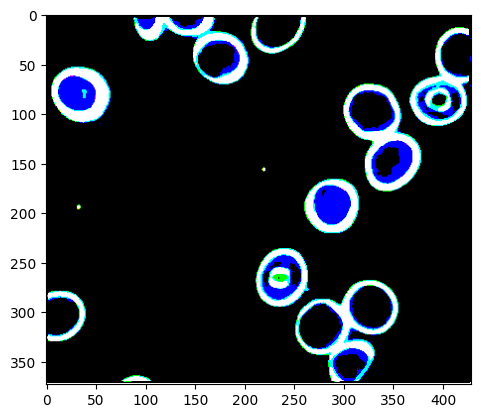

In [ ]:
# convert to binary
ret,thresh = cv2.threshold(image_origin,100,255,cv2.THRESH_BINARY)
cv2.imwrite("image_biner.png",thresh)
plt.imshow(thresh)

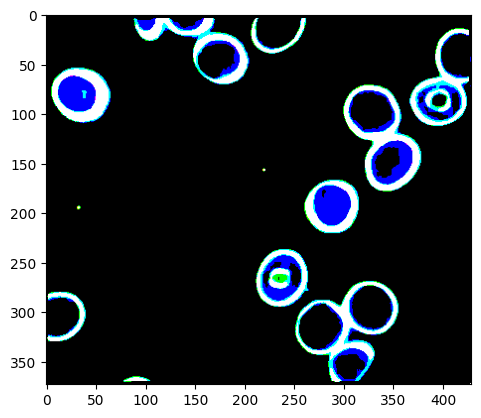

In [ ]:
# image_erosi
erosion = cv2.erode(thresh,(5,5),iterations = 1)
cv2.imwrite("image_erosion.png",erosion)
plt.imshow(erosion)

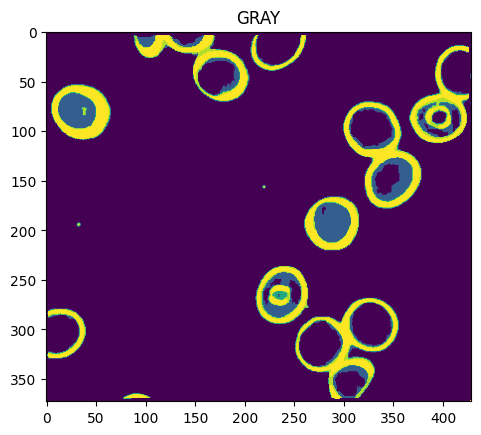

In [ ]:
imgray = cv2.cvtColor(erosion, cv2.COLOR_BGR2GRAY)
plt.title('GRAY')
plt.imshow(imgray)
plt.show()

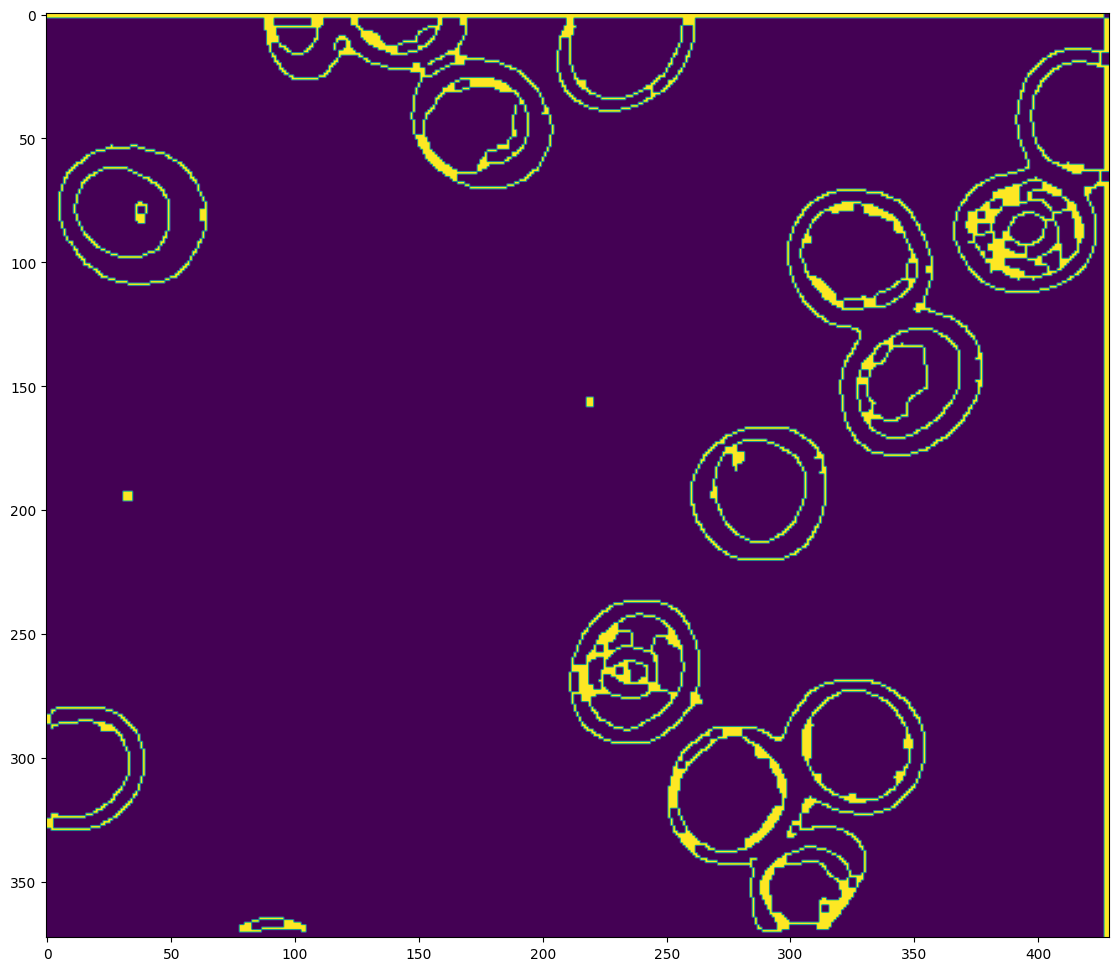

In [ ]:
# edge detection
image_edge = cv2.Canny(imgray,50,100)
image_edge = cv2.dilate(image_edge, None, iterations=1)
image_edge = cv2.erode(image_edge, None, iterations=1)
plt.figure(figsize = (20,12))
plt.imshow(image_edge)
plt.show()

Jumlah Koloni :3


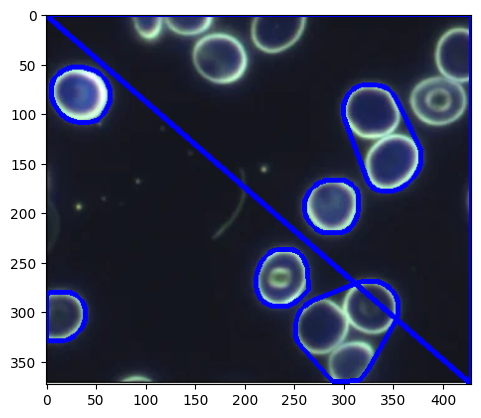

In [ ]:
image_contorus = image_origin.copy()
count = 0

# contours
contour,hier = cv2.findContours(image_edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contour:
  if cv2.contourArea(c) < 100:
    count = count + 1
    continue
  hull = cv2.convexHull(c)
  cv2.drawContours(image_contorus,[hull],0,(0,0,255),3)

print("Jumlah Koloni :"+ str((count)))
cv2.imwrite("image_result.png",image_contorus)
plt.imshow(image_contorus)